In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd # pandas
import seaborn as sns
import matplotlib.pyplot as plt
from variable_factor_map import pca_map

In [2]:
df = pd.read_csv('Fichier_Poissons_tp5.csv',delimiter=';',decimal=',')

In [3]:
df_st =  StandardScaler().fit_transform(df)  
#nombre d'individu que l'on veut (ici 40)
# car nous avons 40 individus dans notre jeu de donnée
df_st = pd.DataFrame(df_st, columns=df.columns).head(40)
df_st

longueur     poids   gonades       age  nombre_oeufs
0  -0.783732 -0.835553 -0.751639  1.380403     -1.066028
1   0.343742 -0.369706 -1.537608 -0.334643     -1.360749
2  -1.962454 -1.767248 -1.734100 -1.192166     -1.635578
3  -0.732483 -0.799719 -0.851890 -1.192166     -1.161843
4   1.471216  0.454485 -0.940111  0.522880     -0.252940
5   0.036249 -0.154700 -2.467938 -1.192166     -2.446727
6  -0.578736 -0.441375 -0.535096 -2.049689     -0.333230
7   0.241244  0.920332  0.290973  1.380403      0.517942
8  -0.783732 -0.943056 -0.555147 -0.334643     -0.384654
9  -0.732483 -0.083031  0.250872 -0.334643     -0.246390
10  2.649938  2.927058  0.740098  1.380403      1.934783
11 -0.527488 -0.477209  0.964660 -0.334643      0.117705
12 -0.783732 -0.513044  0.194732 -0.334643     -0.398723
13  0.036249  0.275313 -0.210283  0.522880      1.181609
14 -1.603712 -1.588076 -1.116553 -1.192166     -0.919760
15 -1.347468 -1.337235 -0.952141 -0.334643     -0.573372
16  1.881206  0.956167 -0.503016  2.237926     -0.112735
17 -0.015000 -0.190534  0.018290  0.522880     -0.342447
18  1.368718  0.741160  0.908520  0.522880      0.455845
19 -0.066248 -0.441375  0.551626 -1.192166     -0.434623
20 -0.271244 -0.943056  0.655887  0.522880      0.585376
21  0.394991  0.920332  1.056891  0.522880      1.190827
22 -0.168746 -0.333872 -0.739609 -0.334643      0.178589
23  0.189996  0.454485  0.816289  0.522880      1.830722
24 -0.783732 -0.799719 -0.418805  0.522880     -0.606361
25  0.753732 -0.333872  0.090471 -0.334643     -0.004792
26  0.651235  0.992001  0.262902  0.522880      0.850989
27  0.138747 -0.047197 -0.607277  0.522880     -0.075865
28 -1.296220 -0.477209  0.363154 -0.334643     -0.071013
29 -1.193722 -1.122228 -0.779709  0.522880     -0.622856
30  0.343742  0.382816  0.294983  1.380403     -0.468583
31  1.932455  2.461211  3.106024  2.237926      2.161585
32 -0.271244 -0.405540  0.274933 -1.192166      0.275617
33 -0.271244 -0.548878 -0.519056 -1.192166     -0.998352
34  0.497488  0.848663  0.298993 -0.334643      0.746199
35  0.343742  0.526154  0.210772 -0.334643      0.003455
36 -0.322492 -0.369706  0.154631 -0.334643      0.143417
37 -1.091224 -0.799719  0.226812 -1.192166     -0.247118
38  1.009976  2.174536  2.560658 -0.334643      2.610821
39 -0.322492  0.382816  0.210772 -1.192166     -0.384654

In [4]:
pca_out = PCA().fit(df_st)

In [5]:
# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.69546613, 0.16297351, 0.09717105, 0.02832997, 0.01605934])

In [6]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.69546613, 0.85843964, 0.95561069, 0.98394066, 1.        ])

In [7]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5
variable                                                      
longueur      0.442823  0.398638  0.489139 -0.136200  0.622245
poids         0.502951  0.109612  0.409558 -0.013547 -0.753063
gonades       0.437061 -0.570820 -0.231427 -0.648560  0.094620
age           0.357977  0.586498 -0.722839 -0.026974 -0.068183
nombre_oeufs  0.481434 -0.399070 -0.130198  0.748270  0.179180

<AxesSubplot:ylabel='variable'>

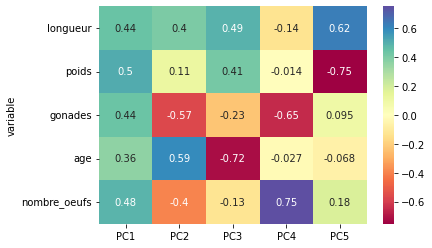

In [8]:
sns.heatmap(loadings_df, annot=True, cmap='Spectral')

In [9]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([3.55167681, 0.83228959, 0.49624295, 0.14467836, 0.08201345])

In [10]:
#Le scree plot sera sauvegarder dans votre repertoire courant
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [11]:
#Le plot sera sauvegarder dans votre repertoire courant Format 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [12]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [13]:
pca_scores = PCA().fit_transform(df_st)

In [14]:
# get 2D biplot (sauvegarder dans repertoire)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

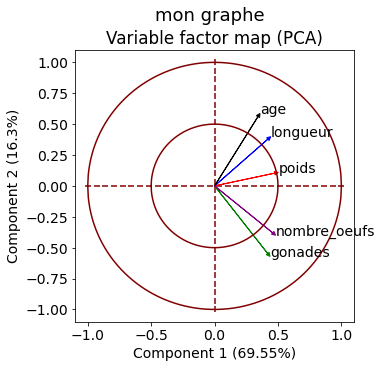

In [17]:
#pcam_map sur 'df_st' et non df
pca_map(df_st, figsize=(5,5), sup="mon graphe", print_values= False)

In [20]:
# get 3D biplot (sauvegarder dans repertoire)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [21]:
#biplot en fonction d'une variable qualitative
# Exemple biplot en fonction de l'age
# on retire l'age (colonne 3)
X=df.iloc[:,[0,1,2,4]]
X.head(2)

longueur  poids  gonades  nombre_oeufs
0       420    785     74.1         10676
1       442    850     54.5          9461

In [22]:
#on assigne à target la colonne 'age'
target = df['age'].to_numpy()

In [23]:
X_st =  StandardScaler().fit_transform(X)
pca_out = PCA().fit(X_st)

In [24]:
# component loadings
loadings = pca_out.components_
loadings

array([[ 0.47040065,  0.53230278,  0.48006991,  0.51469395],
       [ 0.64556301,  0.32119008, -0.57631047, -0.38464474],
       [-0.18568163,  0.05779215, -0.66006836,  0.7255978 ],
       [ 0.57227087, -0.78112147,  0.04133874,  0.2462649 ]])

In [25]:
pca_out.explained_variance_

array([3.16967011, 0.69380343, 0.14667804, 0.08984842])

In [26]:
#get biplot en fonction de l'age
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target)

In [27]:
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [28]:
import plotly.express as px

pca = PCA(n_components=4)
components = PCA().fit_transform(X_st)

fig = px.scatter(components, x=0, y=1)
fig.show()
